In [1]:
from etabstopython import EtabsModel

### 📐 ETABS Force Unit System Codes

| Member name | Value | Description |
|-------------|--------|-------------|
| lb_in_F     | 1      |             |
| lb_ft_F     | 2      |             |
| kip_in_F    | 3      |             |
| kip_ft_F    | 4      |             |
| kN_mm_C     | 5      |             |
| kN_m_C      | 6      |             |
| kgf_mm_C    | 7      |             |
| kgf_m_C     | 8      |             |
| N_mm_C      | 9      |             |
| N_m_C       | 10     |             |
| Ton_mm_C    | 11     |             |
| Ton_m_C     | 12     |             |
| kN_cm_C     | 13     |             |
| kgf_cm_C    | 14     |             |
| N_cm_C      | 15     |             |
| Ton_cm_C    | 16     |             |


In [2]:
units = 12
# Model
model = EtabsModel(units=units , name='PRY POST PUCE')
# Summary
model.summary()

✅ Connected to ETABS.
📏 Units set to 12.
📦 ETABS Model Summary
🧾 Model name: PRY POST PUCE
📏 Unit system code: 12
──────────────────────────────────────────────
🏢 Story definitions loaded: 27
📐 Floor heights vector: [0.0, 4.7, 8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38.0, 41.7, 45.4, 51.9, 55.6, 59.3, 63.0, 66.7, 70.4, 74.1, 77.8, 81.5, 85.2, 88.9, 92.6, 96.3, 100.0]
🔗 Point connections loaded: 1055
📦 Frame section summary: 8
🧱 Rectangular concrete sections: 8
🧩 Frame assignments with sections: 1052
🧱 Beams loaded: 744
🧱 Columns loaded: 232
🧱 Braces loaded: 76
📊 Linear elements combined: 1052
🧱 Walls loaded: 156
🪵 Floors loaded: 52
🧩 Floor point groups: 25 levels
🎨 Frame section colors assigned: 5
📉 Element column forces: 66120
🌀 Modal mass ratios: 50
🧮 Story forces: 4940
------------------------------------------------------------------------------------------------------------------------------------------------------
📊 Load combos: ['Dead' 'Live' 'Modal' 'SCM' 'Sx_AEE_Tr475y'

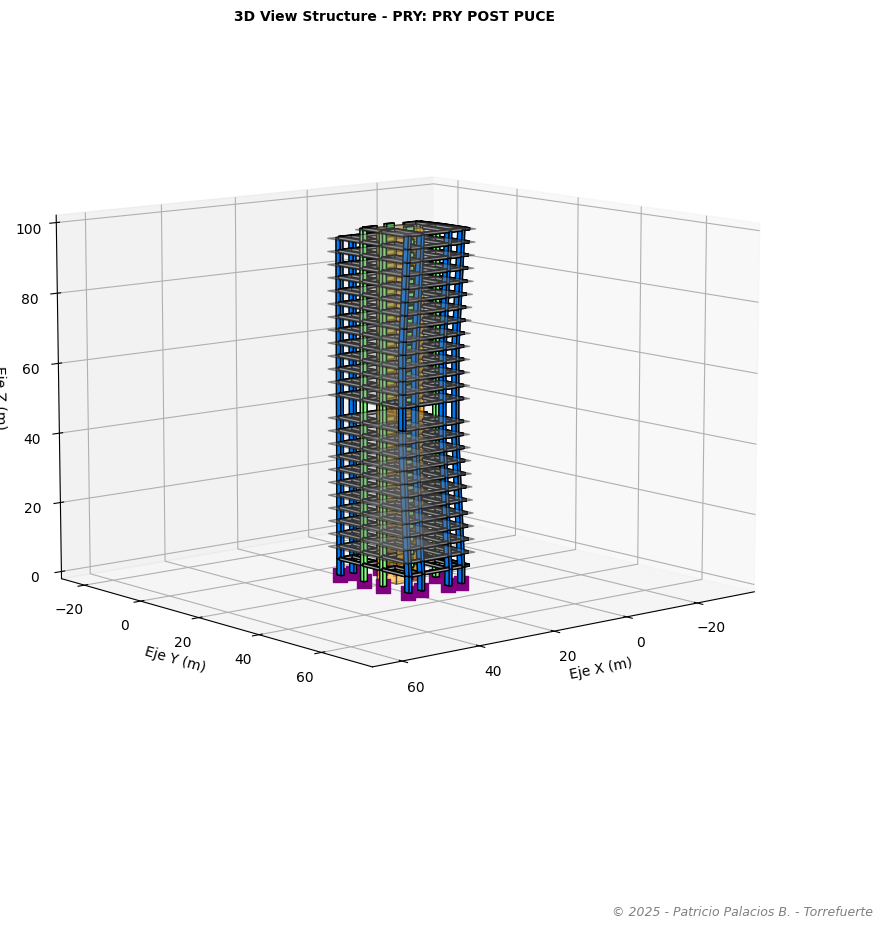

In [3]:
from etabstopython.plotter import plot_structure_3d
plot_structure_3d(model)


### Modal

In [9]:
model.modal_participating_mass_ratios

,Case,Mode,Period,UX,UY,UZ,SumUX,SumUY,SumUZ,RX,RY,RZ,SumRX,SumRY,SumRZ
0,Modal,1,2.422,1.652E-06,0.6516,0,1.652E-06,0.6516,0,0.3634,1.614E-06,0.0001,0.3634,1.614E-06,0.0001
1,Modal,2,2.38,0.6868,2.105E-06,0,0.6868,0.6516,0,1.239E-06,0.3303,0.0001,0.3634,0.3303,0.0002
2,Modal,3,1.522,0.0005,0.0001,0,0.6874,0.6516,0,0.0001,0.0006,0.7512,0.3634,0.3309,0.7514
3,Modal,4,0.61,0.1795,0,0,0.8669,0.6516,0,0,0.3467,0.0001,0.3634,0.6776,0.7515
4,Modal,5,0.531,7.248E-07,0.1816,0,0.8669,0.8332,0,0.2597,1.489E-06,0.0002,0.6231,0.6776,0.7516
5,Modal,6,0.468,0.0001,0.0002,0,0.867,0.8334,0,0.0003,0.0002,0.1213,0.6234,0.6778,0.8729
6,Modal,7,0.304,0.0476,0,0,0.9146,0.8334,0,0,0.0931,2.581E-06,0.6234,0.7709,0.8729
7,Modal,8,0.26,3.454E-05,0.0001,0,0.9147,0.8336,0,0.0003,0.0001,0.0453,0.6237,0.7709,0.9182
8,Modal,9,0.219,0,0.0689,0,0.9147,0.9024,0,0.1273,0,0.0001,0.7509,0.7709,0.9183
9,Modal,10,0.187,0.0273,0,0,0.942,0.9024,0,5.909E-07,0.0708,0,0.7509,0.8417,0.9183


### Drift

In [4]:
Cd = 5.5
Ie = 1.25
R = 1.0

print(Cd*Ie/R)

6.875


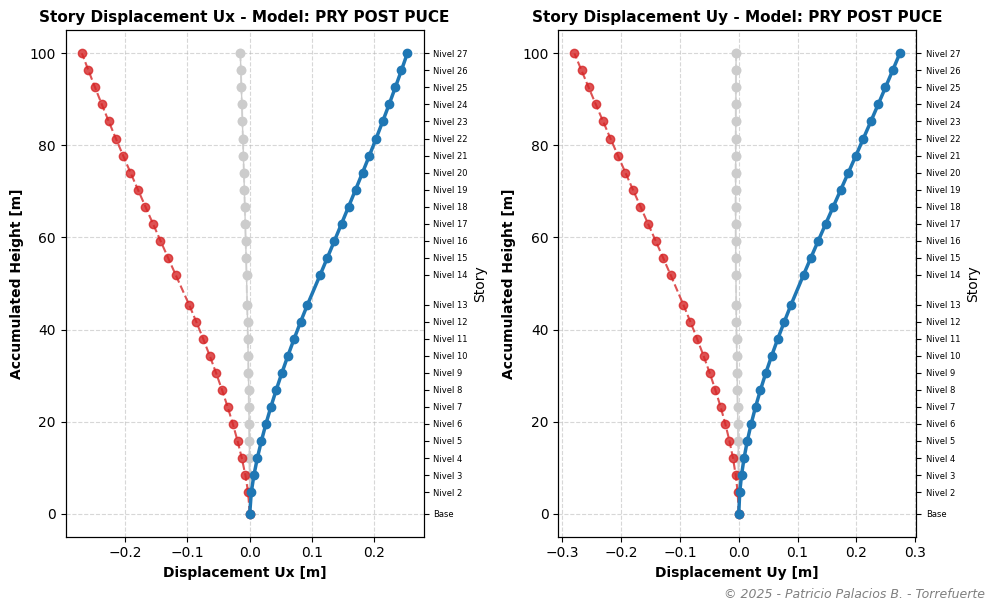

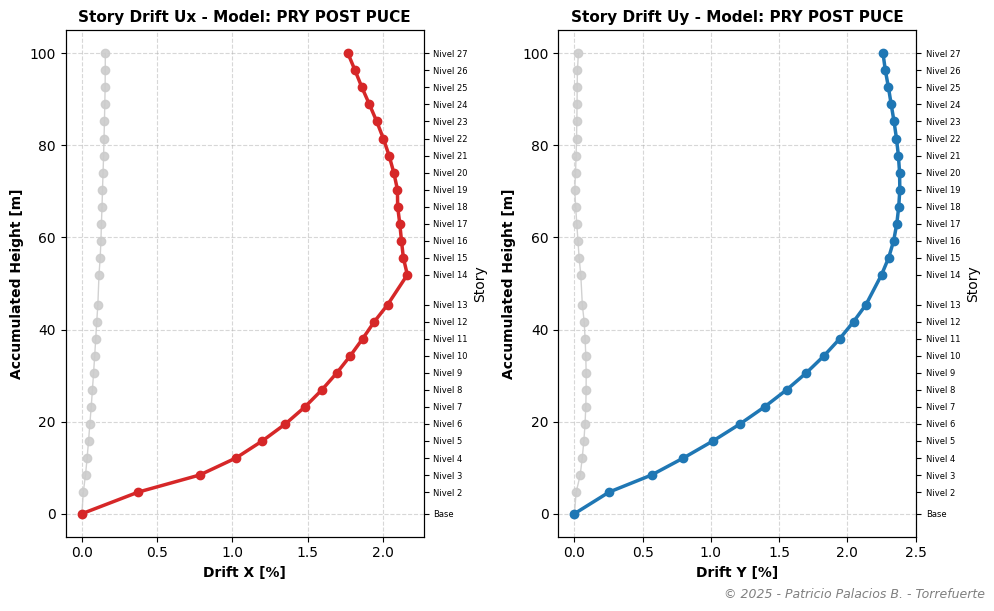

In [ ]:
from etabstopython.plotter import plot_story_displacement_bounds
from etabstopython.plotter import plot_story_drift_bounds



combos_comp=['1.2D+1.0E+1.0L+0.2S (1X)' , '1.2D+1.0E+1.0L+0.2S (2X)'    , '1.2D+1.0E+1.0L+0.2S (3X)'     , '1.2D+1.0E+1.0L+0.2S (4X)', 
             '0.9D+1.0E (1X)'           , '0.9D+1.0E (2X)'              , '0.9D+1.0E (3X)'               , '0.9D+1.0E (4X)', 
             '1.2D+1.0E+1.0L+0.2S (1Y)' , '1.2D+1.0E+1.0L+0.2S (2Y)'    , '1.2D+1.0E+1.0L+0.2S (3Y)'     , '1.2D+1.0E+1.0L+0.2S (4Y)', 
             '0.9D+1.0E (1Y)'           , '0.9D+1.0E (2Y)'              , '0.9D+1.0E (3Y)'               , '0.9D+1.0E (4Y)' , ]


# combos_comp=['1.2D+1.6L', '1.2D+1.0E+1.0L+0.2S (3X)' ]
combos_comp=['1.2D+1.6L']
highlight_combo='Envolvente-AEE'


plot_story_displacement_bounds(model, combos_comp, color=[0.8, 0.8, 0.8], lw=1.0, highlight_combo=highlight_combo , factor=1.0)
plot_story_drift_bounds(model, combos_comp, color=[0.8, 0.8, 0.8], lw=1.0, highlight_combo=highlight_combo, factor=Cd*Ie/R)
